# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

Cell ini memuat semua library yang diperlukan untuk proyek: pandas, numpy, serta matplotlib dan seaborn untuk analisis dan visualisasi; winsorize, SMOTE, dan MinMaxScaler untuk pembersihan, penyeimbangan kelas, dan normalisasi data; PCA dan train_test_split untuk reduksi dimensi dan pemisahan data; empat algoritma klasifikasi inti (Logistic Regression, Random Forest, K‑NN, SVM) beserta cross_val_score dan GridSearchCV guna evaluasi serta tuning; dan akhirnya metrik evaluasi seperti classification_report, confusion_matrix, dan roc_auc_score (plus RocCurveDisplay) untuk menilai kinerja model.

# Data Loading

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Kode ini membaca dataset diabetes.csv menggunakan pandas dan menyimpannya dalam variabel df. Perintah df di akhir digunakan untuk menampilkan isi dataset, sehingga pengguna dapat melihat struktur awal data seperti jumlah kolom, baris, dan contoh nilai di setiap fitur.

# Data Understanding & EDA

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Untuk mengecek nilai null yang ada di data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Untuk melihat informasi utama dari setiap column

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Kode ini menampilkan ringkasan statistik deskriptif dari setiap kolom numerik dalam dataset, seperti nilai minimum, maksimum, rata-rata (mean), standar deviasi (std), serta kuartil (25%, 50%, 75%). Ini membantu memahami distribusi, skala, dan potensi adanya outlier pada data.

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Untuk melihat jumlah data dari setiap Outcome yang ada

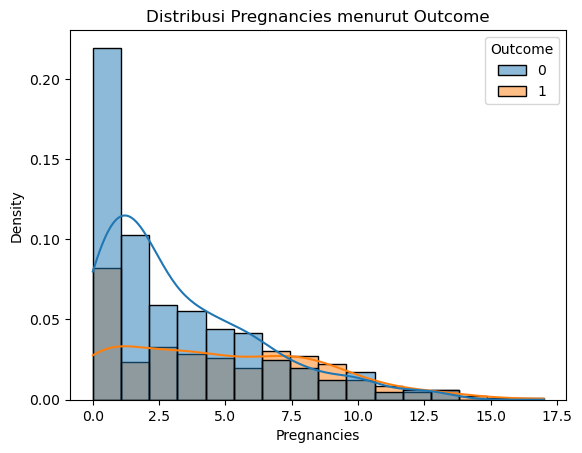

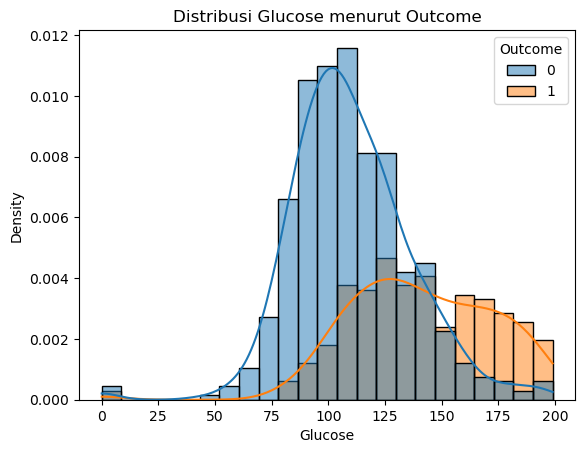

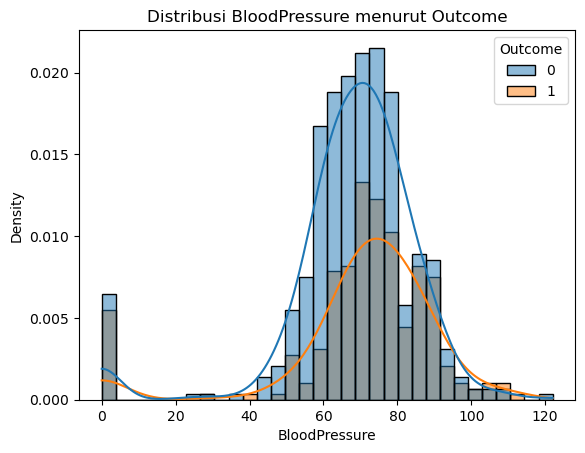

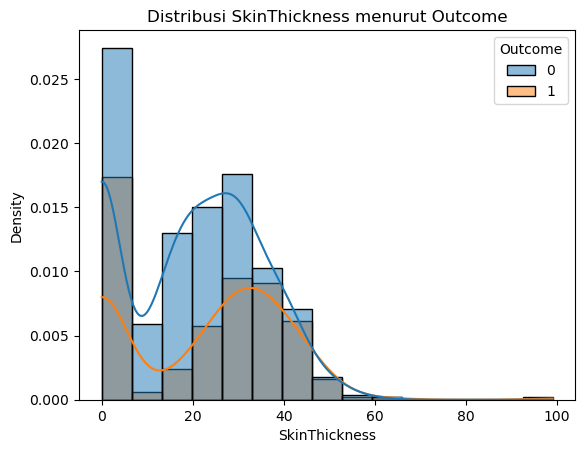

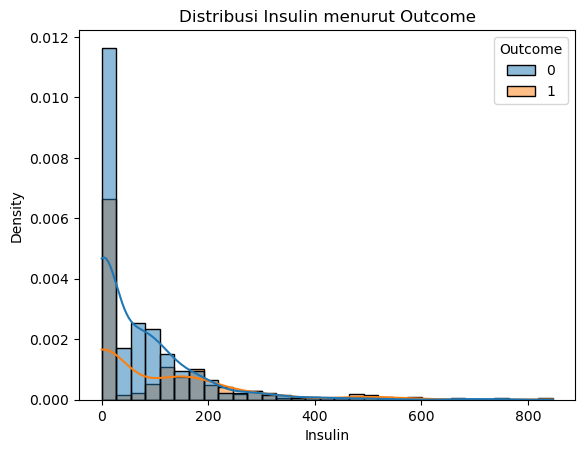

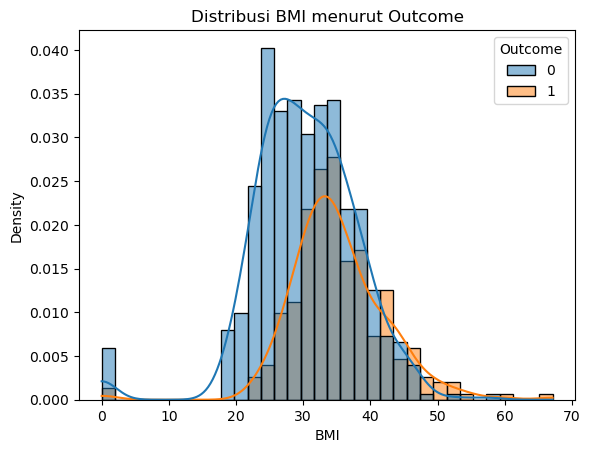

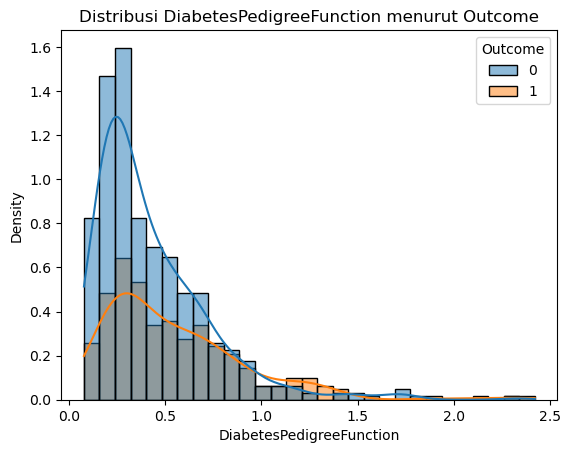

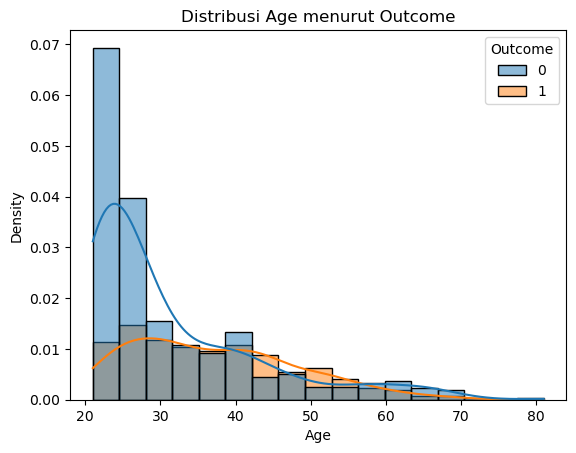

In [7]:
for c in df.columns[:-1]:
    plt.figure()
    sns.histplot(data=df, x=c, hue='Outcome', kde=True, stat='density')
    plt.title(f'Distribusi {c} menurut Outcome')
    plt.show()

Melakukan visualisasi distribusi setiap fitur numerik pada dataset terhadap label Outcome. Hal ini membantu memahami bagaimana pola distribusi data dari masing-masing fitur ketika dibedakan berdasarkan apakah pasien menderita diabetes (Outcome=1) atau tidak (Outcome=0).

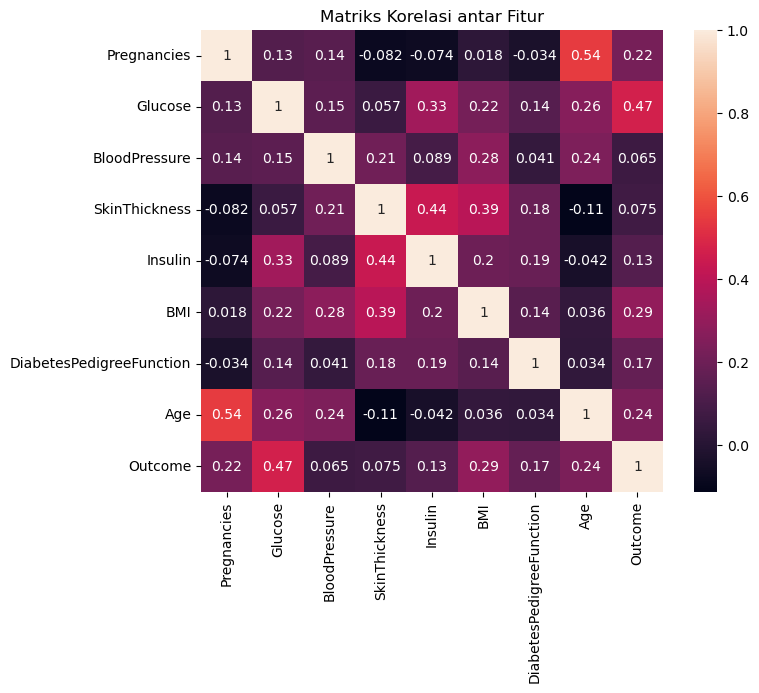

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, square=True)
plt.title('Matriks Korelasi antar Fitur')
plt.show()

Bertujuan untuk melihat korelasi setiap fitur dengan fitur yang lainnya

In [9]:
group_stats = df.groupby('Outcome').agg(['median', 'mean', 'std'])
group_stats

Pregnancies                     Glucose                         \
             median      mean       std  median        mean        std   
Outcome                                                                  
0               2.0  3.298000  3.017185   107.0  109.980000  26.141200   
1               4.0  4.865672  3.741239   140.0  141.257463  31.939622   

        BloodPressure                       SkinThickness  ...     Insulin  \
               median       mean        std        median  ...         std   
Outcome                                                    ...               
0                70.0  68.184000  18.063075          21.0  ...   98.865289   
1                74.0  70.824627  21.491812          27.0  ...  138.689125   

           BMI                      DiabetesPedigreeFunction            \
        median       mean       std                   median      mean   
Outcome                                                                  
0        30.05  30.304200  7.689855                    0.336  0.429734   
1        34.25  35.142537  7.262967                    0.449  0.550500   

                     Age                        
              std median       mean        std  
Outcome                                         
0        0.299085   27.0  31.190000  11.667655  
1        0.372354   36.0  37.067164  10.968254  

[2 rows x 24 columns]

Menghitung nilai median, mean, dan standar deviasi (std) dari setiap fitur numerik dalam dataset, dikelompokkan berdasarkan nilai Outcome (0 = tidak diabetes, 1 = diabetes).

# Data Preprocessing

### Winsorize

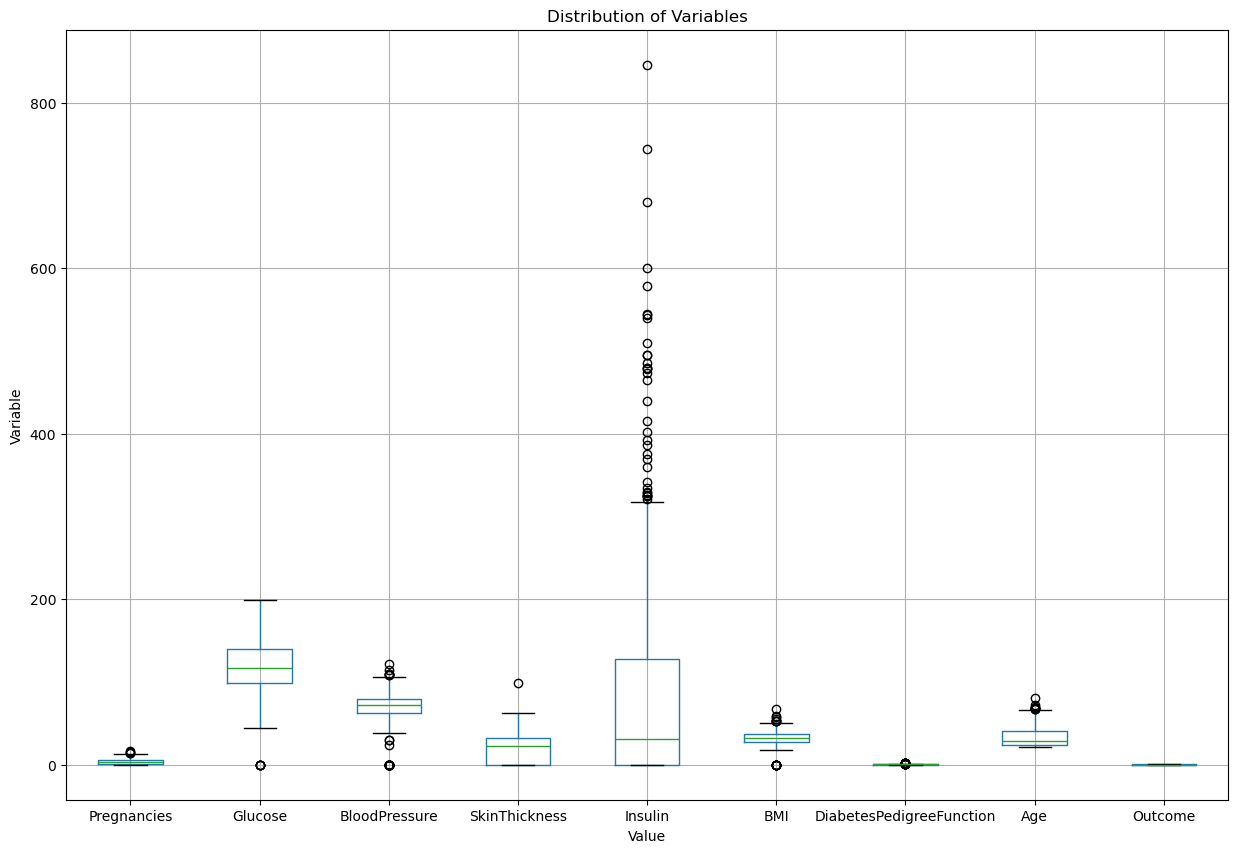

In [10]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.show()

Kode diatas bertujuan untuk membuatkan Boxplot untuk menampilkan nilai dari setiap colum yang merupakan Outlier

In [11]:
for col in df.select_dtypes(include=['number']).columns:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

Tujuan untuk mengurangi pengaruh outlier ekstrem pada setiap fitur numerik dengan menerapkan winsorizing, yaitu membatasi nilai-nilai ekstrim ke persentil tertentu.

winsorize(..., limits=[0.05, 0.05]): Memotong nilai-nilai pada setiap kolom ke dalam batas 5% terbawah dan 5% teratas. Nilai-nilai di luar batas ini akan diganti dengan nilai pada batas persentil tersebut.

### Normalization

In [12]:
scaler = MinMaxScaler()

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.676471,0.653846,0.795455,0.000000,0.519824,0.488956,0.783784
1,0.1,0.058824,0.538462,0.659091,0.000000,0.211454,0.211847,0.270270
2,0.8,1.000000,0.500000,0.000000,0.000000,0.066079,0.534137,0.297297
3,0.1,0.098039,0.538462,0.522727,0.320819,0.277533,0.027108,0.000000
4,0.0,0.568627,0.038462,0.795455,0.573379,0.938326,1.000000,0.324324
...,...,...,...,...,...,...,...,...
763,1.0,0.215686,0.730769,1.000000,0.614334,0.488987,0.031124,1.000000
764,0.2,0.421569,0.615385,0.613636,0.000000,0.660793,0.200803,0.162162
765,0.5,0.411765,0.653846,0.522727,0.382253,0.193833,0.105422,0.243243
766,0.1,0.460784,0.423077,0.000000,0.000000,0.365639,0.209839,0.702703


Melakukan normalisasi fitur numerik ke rentang 0–1 menggunakan MinMaxScaler agar skala data seragam dan tidak bias terhadap fitur dengan nilai besar.

### SMOTE

In [13]:
sm = SMOTE(random_state=42)

X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

print("Sebelum SMOTE:", y.value_counts())
print("Sesudah SMOTE:", pd.Series(y_resampled).value_counts())

Sebelum SMOTE: Outcome
0    500
1    268
Name: count, dtype: int64
Sesudah SMOTE: Outcome
1    500
0    500
Name: count, dtype: int64


Kode ini menerapkan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan jumlah data pada masing-masing kelas target. SMOTE membuat sampel sintetis pada kelas minoritas agar distribusi kelas menjadi seimbang, sehingga model tidak bias terhadap kelas mayoritas.

In [14]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='Outcome')
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.600000,0.676471,0.653846,0.795455,0.000000,0.519824,0.488956,0.783784,1
1,0.100000,0.058824,0.538462,0.659091,0.000000,0.211454,0.211847,0.270270,0
2,0.800000,1.000000,0.500000,0.000000,0.000000,0.066079,0.534137,0.297297,1
3,0.100000,0.098039,0.538462,0.522727,0.320819,0.277533,0.027108,0.000000,0
4,0.000000,0.568627,0.038462,0.795455,0.573379,0.938326,1.000000,0.324324,1
...,...,...,...,...,...,...,...,...,...
995,0.639756,0.914252,0.584803,0.000000,0.000000,0.392124,0.210709,0.323994,1
996,0.133889,0.231246,0.809437,0.618897,0.068032,0.573193,0.085025,0.093143,1
997,0.257454,0.934296,0.931259,0.623306,0.419162,0.522539,0.950663,0.837838,1
998,0.294619,0.477536,0.989653,1.000000,0.535621,0.636772,0.817442,0.292935,1


Kode ini menggabungkan kembali data fitur (X_resampled) dan label (y_resampled) hasil SMOTE ke dalam satu DataFrame (df_resampled) untuk memudahkan analisis dan pemrosesan selanjutnya.

### PCA

In [15]:
pca = PCA(n_components=2, random_state=42)

X_pca = pca.fit_transform(X_resampled)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Outcome'] = y_resampled.values
X_pca_df.head()

,PC1,PC2,Outcome
0,0.184891,0.448808,1
1,-0.266330,-0.398592,0
2,-0.428668,0.426925,1
3,-0.196051,-0.561016,0
4,0.626492,-0.416378,1


Kode ini menerapkan PCA (Principal Component Analysis) untuk mereduksi dimensi fitur menjadi dua komponen utama (PC1 dan PC2), dengan tujuan menyederhanakan data dan memudahkan visualisasi tanpa kehilangan terlalu banyak informasi penting.

# Model Training with PCA

## Train - Test Split

In [16]:
X_pca = X_pca_df.drop(['Outcome'], axis=1)
y_pca = X_pca_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size = 0.2, random_state = 42)

Kode ini memisahkan data fitur (X) dan target (y) dari DataFrame hasil SMOTE, lalu membagi data menjadi data latih dan data uji dengan rasio 80:20 menggunakan train_test_split, untuk keperluan pelatihan dan evaluasi model.

In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale')
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

Logistic Regression: Mean Accuracy = 0.6813
Random Forest: Mean Accuracy = 0.7150
KNN: Mean Accuracy = 0.6975
SVM: Mean Accuracy = 0.7175


Kode ini membandingkan performa empat model machine learning (Logistic Regression, Random Forest, KNN, dan SVM) menggunakan 5-fold cross-validation dan metrik akurasi untuk mengevaluasi rata-rata kinerja tiap model pada data latih. Model ini dilatih dengan data PCA

# Model Training without PCA

## Train - Test Split

In [18]:
X = df_resampled.drop(['Outcome'], axis=1)
y = df_resampled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Kode ini memisahkan data fitur (X) dan target (y) dari DataFrame hasil SMOTE, lalu membagi data menjadi data latih dan data uji dengan rasio 80:20 menggunakan train_test_split, untuk keperluan pelatihan dan evaluasi model.

In [19]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


Kode ini digunakan untuk menampilkan jumlah total sampel pada dataset keseluruhan, serta membandingkannya dengan jumlah sampel pada dataset pelatihan dan pengujian setelah dilakukan pembagian data (train-test split).

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale')
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")

Logistic Regression: Mean Accuracy = 0.7525
Random Forest: Mean Accuracy = 0.8088
KNN: Mean Accuracy = 0.7613
SVM: Mean Accuracy = 0.8025


Kode ini membandingkan performa empat model machine learning (Logistic Regression, Random Forest, KNN, dan SVM) menggunakan 5-fold cross-validation dan metrik akurasi untuk mengevaluasi rata-rata kinerja tiap model pada data latih. Model ini dilatih tanpa PCA

### Fine Tuning Random Forest

In [21]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(min_samples_split=5)


Kode ini melakukan hyperparameter tuning Random Forest menggunakan GridSearchCV. Pertama, param_grid mendefinisikan kombinasi nilai yang akan diuji untuk sejumlah parameter penting—jumlah pohon (n_estimators 100 atau 200), kedalaman maksimum pohon (max_depth None, 10, 20), ukuran minimal pemisahan dan daun (min_samples_split, min_samples_leaf), serta opsi bootstrap. GridSearchCV kemudian melatih model pada setiap kombinasi tersebut dengan 5‑fold cross‑validation, mem‐benchmark kinerja berdasarkan akurasi guna mencegah overfitting dan memperoleh estimasi performa yang stabil. Setelah dipanggil fit, objek grid_search memilih konfigurasi terbaik; perintah best_params_ menampilkan set parameter teroptimal, sedangkan best_estimator_ memberikan model Random Forest siap pakai yang diharapkan memiliki generalisasi paling baik pada data baru.

### Updating Model Random Forest

In [22]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.78      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



Kode ini menggunakan model Random Forest terbaik hasil GridSearchCV untuk memprediksi data uji (X_test). Hasil prediksi (y_pred) kemudian dievaluasi menggunakan classification_report, yang menampilkan metrik akurasi, precision, recall, dan F1-score untuk masing-masing kelas. Ini membantu mengukur seberapa baik model dalam mengklasifikasikan data dengan benar, khususnya dalam konteks ketidakseimbangan kelas.

# Model Evaluation

In [23]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.78      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



Kode ini menggunakan model Random Forest terbaik hasil GridSearchCV untuk memprediksi data uji (X_test). Hasil prediksi (y_pred) kemudian dievaluasi menggunakan classification_report, yang menampilkan metrik akurasi, precision, recall, dan F1-score untuk masing-masing kelas. Ini membantu mengukur seberapa baik model dalam mengklasifikasikan data dengan benar, khususnya dalam konteks ketidakseimbangan kelas.

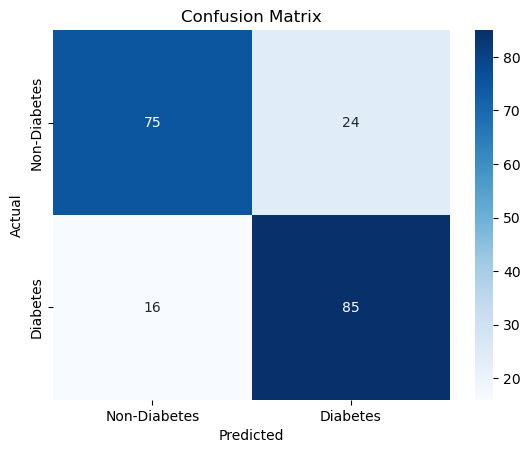

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Kode ini menghitung confusion matrix dari prediksi model (y_pred) terhadap label sebenarnya (y_test), lalu menampilkannya sebagai heatmap berwarna biru dengan anotasi angka. Sumbu x mewakili kelas yang diprediksi (Non‑Diabetes, Diabetes) dan sumbu y mewakili kelas aktual, sehingga memudahkan identifikasi jumlah true positive, true negative, false positive, dan false negative—informasi kunci untuk menilai kesalahan dan keberhasilan model secara visual.

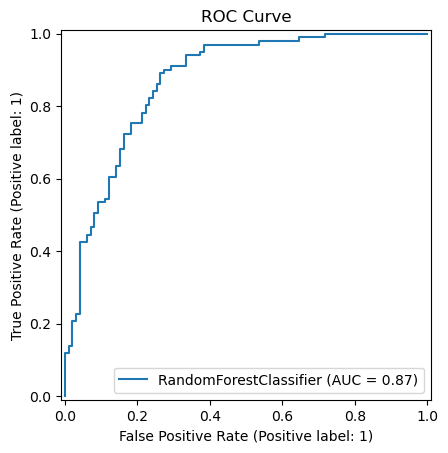

ROC AUC Score: 0.8710


In [25]:
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc:.4f}")

Kode ini menampilkan kurva ROC (Receiver Operating Characteristic) untuk model Random Forest terbaik (best_rf) guna mengevaluasi performa klasifikasi dalam membedakan kelas. Kurva ROC memvisualisasikan trade-off antara True Positive Rate dan False Positive Rate. Selain itu, dihitung nilai ROC AUC (Area Under the Curve) menggunakan probabilitas prediksi (y_proba), yang menunjukkan kemampuan model secara keseluruhan—semakin mendekati 1, semakin baik performa model.